# The Sparks Foundation
# Task 1 - Prediction using Supervised Machine Learning
### Objective - Predict percentage of marks of a student based on the number of study hours.

# Author : Yash Jhalani

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Step 1 : Importing the  libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Step 2 : Loading the dataset

In [5]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
sd_scores = pd.read_csv(url)
print("Data imported successfully")
sd_scores.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 3 : Inspecting the data

In [6]:
sd_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
sd_scores.describe() #some descriptive statistics measures like mean, median, standard deviation 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 4 : Visualising the data

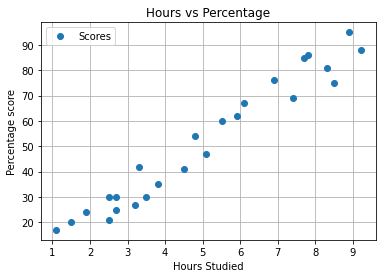

In [9]:
sd_scores.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.grid()
plt.show()


#### Therefore we observe that there exists a postive linear relationship between the two variables. We can confirm this positive relationship by computing the correlation between the two variables.

In [10]:
sd_scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### The correlation is +0.976191 which shows the strong positive linear relationship between the variables hours and scores.

## Step 5 : Preparing the data

In [12]:
X = sd_scores.iloc[:, :-1].values  
y = sd_scores.iloc[:, 1].values


In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 6 : Training the Algorithm

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print("ALGORITHM TRAINED")

ALGORITHM TRAINED


## Step 7 : Regression

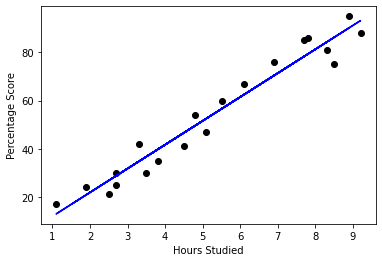

In [16]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X_train, y_train, color='black')
plt.plot(X, line, color='blue');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

## Step 8 : Making Predictions

In [18]:
print(X_test)
y_pred = regressor.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Step 9 : Comparing Actual vs Predicted Model

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Step 10 : Predicting the score of student on the basis of no. of hours studied

In [30]:
hours= 9.25
percentage=regressor.predict([[hours]])
print("The predicted score if a person studies for",hours,"is",percentage[0])

The predicted score if a person studies for 9.25 is 93.69173248737538


## Step 11 : Evaluating the model

In [33]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R Squared value:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
R Squared value: 0.9454906892105356


#### The R square value or the coefficient of determinaton is .9459 which signifies that 94.5% of the variation in score is explained by the no. of hours studied.